# Ex Chap_8 Credit Card Fraud Detection via Dimension Reduction

Dataset:[kaggle Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_import = pd.read_csv('../../data_local/creditcard.csv') # large file 150MB

In [3]:
data_import

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
unused = data_import[["Time","Amount"]]
X = data_import.iloc[:,1:-2] # remove the first "time" and last "amount" "class" columns
y = data_import["Class"]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [5]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=10) # 10 components
X10D = pca.fit_transform(X) # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D

,0,1,2,3,4,5,6,7,8,9
0,1.359837,0.072890,-2.536194,1.378486,0.337664,0.462535,0.239497,-0.100321,0.361644,-0.102356
1,-1.191997,-0.266835,-0.167225,0.449905,-0.062905,-0.082232,-0.078554,-0.084898,-0.254667,0.176673
2,1.358311,1.338970,-1.774721,0.380938,0.501857,1.800424,0.796203,-0.235369,-1.506308,-0.218816
3,0.966699,0.187775,-1.789772,-0.872016,0.021816,1.244768,0.237474,-0.361956,-1.384193,0.112813
4,1.158603,-0.875725,-1.546462,0.396193,0.416718,0.094294,0.592907,0.280273,0.825830,-0.715594
...,...,...,...,...,...,...,...,...,...,...
284802,11.880573,-10.076376,9.829333,-2.053462,5.350474,-2.606205,-4.910060,-7.306115,1.923360,-4.465077
284803,0.732797,0.054185,-2.035771,-0.737183,-0.870285,1.059915,0.028247,-0.285005,0.581149,0.963705
284804,-1.919433,0.301537,3.250088,-0.560081,-2.627650,3.031257,-0.295685,-0.707208,0.434002,0.485464
284805,0.240737,-0.528009,-0.699962,0.683145,0.386168,0.622221,-0.688880,-0.679947,0.390391,0.421384


In [16]:
# 95 %  explained variance ratio 
pca = PCA()
XD = pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
d

22

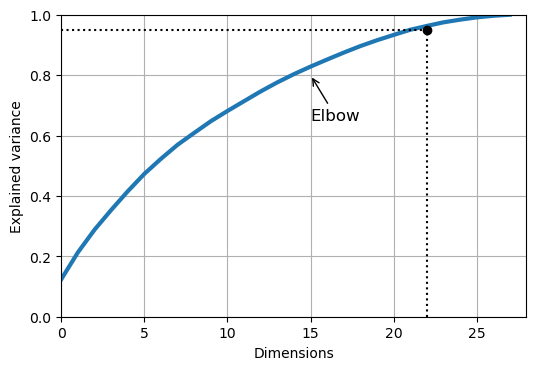

In [34]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.axis([0, 28, 0, 1])
ax.set(xlabel="Dimensions", ylabel="Explained variance")
ax.plot(cumsum, lw=3)
ax.plot([d, d], [0, 0.95], "k:")
ax.plot([0, d], [0.95, 0.95], "k:")
ax.plot(d,0.95,"ko")
ax.annotate("Elbow",
            xy=(15, 0.8),
            xytext=(15, 0.65),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')
ax.grid()

PCA can be used to compress the amount of information that has to be plotted. 

Let's say that you perform PCA and take in all the components that constitute 95% of the variance in the dataset.You can then take those PCA's and inverse transform them to get something close to the origina data. 

- The 5% that you'll be missing is part of the **reconstruction error**.

In [10]:
pca = PCA(n_components=10)  # 10 components
X10D = pca.fit_transform(X)  # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D_inverse = pca.inverse_transform(X10D)
X10D_inverse = pd.DataFrame(X10D_inverse)
X10D_inverse

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.359815,-0.072794,2.536465,1.377268,-0.337880,0.464735,0.244282,0.096288,0.359677,0.078536,...,0.001553,-0.004689,0.000336,0.002209,-0.000552,0.000606,0.000091,0.000017,-0.000020,1.419178e-06
1,1.191603,0.266936,0.165246,0.449142,0.063573,-0.080978,-0.075432,0.080060,-0.265798,-0.198590,...,-0.001303,0.005104,-0.000902,-0.002437,-0.000473,-0.001486,0.000244,0.000029,0.000007,9.750190e-07
2,-1.358751,-1.341193,1.771553,0.375049,-0.502017,1.813551,0.817544,0.231382,-1.556076,0.145858,...,-0.008368,0.016975,0.004820,-0.005552,-0.003387,-0.004168,-0.000651,0.000140,0.000053,2.962012e-06
3,-0.965920,-0.185909,1.796559,-0.870688,-0.008000,1.261064,0.259547,0.366733,-1.404850,-0.105260,...,-0.007077,0.016609,0.002701,-0.005947,-0.003428,-0.005124,-0.000211,0.000151,0.000042,3.862853e-06
4,-1.158143,0.877867,1.548969,0.404138,-0.407461,0.092886,0.586610,-0.267096,0.825618,0.767245,...,0.004946,-0.018864,0.002930,0.008865,0.001825,0.005540,-0.000959,-0.000099,-0.000021,-3.749813e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881864,10.071527,-9.837446,-2.072126,-5.359836,-2.588026,-4.880700,7.281976,1.870873,4.265517,...,0.045121,-0.151862,0.008612,0.065504,0.034612,0.053920,-0.010155,-0.001052,0.000166,-6.473508e-05
284803,-0.732668,-0.055449,2.035814,-0.739887,0.868860,1.059808,0.024856,0.293358,0.579493,-0.975562,...,-0.002294,0.014301,-0.003702,-0.006740,-0.005915,-0.007786,0.002273,0.000206,-0.000071,1.347811e-05
284804,1.919480,-0.302002,-3.250489,-0.558609,2.627429,3.032784,-0.291495,0.707226,0.426122,-0.487065,...,-0.001860,0.010919,-0.002754,-0.005461,-0.003266,-0.005173,0.001274,0.000162,-0.000057,7.728350e-06
284805,-0.239917,0.530071,0.705741,0.687337,-0.379105,0.624844,-0.687014,0.682650,0.400596,-0.387556,...,0.002046,-0.001809,-0.002437,0.000146,-0.000480,-0.000634,0.000716,0.000043,-0.000026,2.585105e-06


In [11]:
X10D # compare

,0,1,2,3,4,5,6,7,8,9
0,1.359816,0.072790,-2.536475,1.377272,0.337921,0.464607,0.244629,-0.095890,0.358277,-0.084534
1,-1.191604,-0.266934,-0.165256,0.449146,-0.063556,-0.081061,-0.075719,-0.080403,-0.262361,0.202956
2,1.358750,1.341187,-1.771572,0.375225,0.502214,1.813119,0.817771,-0.231026,-1.558967,-0.118163
3,0.965920,0.185905,-1.796563,-0.870573,0.008141,1.260900,0.259614,-0.366993,-1.403179,0.129658
4,1.158145,-0.877874,-1.548957,0.404106,0.407416,0.092913,0.587435,0.268478,0.812365,-0.780697
...,...,...,...,...,...,...,...,...,...,...
284802,11.881875,-10.071545,9.837651,-2.072882,5.358742,-2.584542,-4.871692,-7.282235,1.805594,-4.311858
284803,0.732668,0.055449,-2.035813,-0.739795,-0.868721,1.059771,0.024915,-0.293719,0.595678,0.966188
284804,-1.919482,0.302011,3.250489,-0.558353,-2.627245,3.033124,-0.289986,-0.707171,0.434060,0.480434
284805,0.239918,-0.530071,-0.705739,0.687333,0.379128,0.625010,-0.686534,-0.683309,0.407648,0.379550


If you have a lot of dimensions in your PCA then you might want to take a stochastic approach where the computer will try and estimate your PCAs instead of calculating them. 

You can do thisby setting the `svd_ solver` hyperparameter of the `PCA` clags to `randomized`. By default, this hyperparameter is set to `auto` which means that skLearn will run the full PCA unless the amountof dimensions is too high. You can force it to run the full PCA by setting the `svd_ solver` hyperparameter to `full`.

PCAs work only if the whole training dataset fits into memory. Luckily you can run the PCAincrementally using the `Incremental PCA` class.

More work:

1. imbalanced data

2. confusion matrix

In [12]:
### Compare KernelPCA with LogisticRegression

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import KernelPCA

In [13]:
# clf = Pipeline([
#     ("kpca",KernelPCA(n_components=2)),
#     ("log_reg",LogisticRegression())
# ])

# param_grid = [{
#     "kpca__gamma":np.linspace(0.03,0.05,10),
#     "kpca__kernel":["rbf","sigmoid"]
# }]

In [14]:
# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X,y) ## >6min

In [15]:
# print(grid_search.best_params_)